#####Talent Squad - Data Science II

In [1]:
import os
import cv2
import shutil
import random
import matplotlib.image as mpimg
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import tensorflow as tf
import sklearn.metrics as metrics
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
from google.colab import files

drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
sns.set_style("darkgrid")

In [4]:
!ls "/content/drive/My Drive/Talent Squad 2"

code.ipynb  content  Imágenes-data-science-ii


In [5]:
%cd "/content/drive/My Drive/Talent Squad 2"

/content/drive/My Drive/Talent Squad 2


In [6]:
base_dir = "/content/drive/My Drive/Talent Squad 2"

In [7]:
print("Contents of base directory:")
print(os.listdir(base_dir))

print("\nContents of train directory:")
print(os.listdir(f"{base_dir}/Imágenes-data-science-ii/train"))

print("\nContents of test directory:")
print(os.listdir(f"{base_dir}/Imágenes-data-science-ii/test"))

Contents of base directory:
['Imágenes-data-science-ii', '.ipynb_checkpoints', 'content', 'code.ipynb']

Contents of train directory:
['football', 'baseball', 'cricket']

Contents of test directory:
['281e7120-7038-4051-a4bb-455bbac0b912.jpg', '252fa3af-82fa-4f2b-a831-127bcbd99177.jpeg', '141ec68d-e643-46b6-a2c2-335c5d1462f3.jpg', '9eb0aeaa-71d5-4515-8b72-6caa489a88ea.jpg', '0aff16b7-cd5b-4e79-9425-f126ba5a83a4.jpg', '2b82204d-9228-4642-a899-6221420cbc0d.jpg', '75ed83ae-f50b-4133-8f72-1e30a3ad5220.jpg', '1822c970-5e22-4280-9944-182cf317a058.jpg', '455b8100-472c-4699-8604-1a692f27003d.jpg', '197e6913-373b-4e48-b77c-75d9038f1beb.jpg', 'eb3baf60-1147-4ec4-81a3-92b5c9bf4367.jpg', '09240896-2b78-4898-bf4a-a4ff658a5da6.jpg', '529e2503-fee3-46e3-8aa8-25f15c6d97fe.jpg', '01e8bbd6-2c39-465f-ae00-b3a27fb7ee47.png', '17c2c9b4-0ec6-4bf1-af79-e26207eea53b.png', 'f2eeea85-9966-4f34-9769-7ef126490e3c.jpg', 'e735b5de-abc8-485b-831d-f26bc6d393b9.jpg', '07e3baf2-597e-435a-a8f7-024eb2b0ace3.jpg', 'ec08c

Since we will work with flow_from_directory(), we will have to create a new folder to put the test images into it. The reason to do so, is that flow_from_directory iterates over the inner folders and treats them as subdirectories belonging to a specific class. Nevertheless, our test folder has no labels. Therefore, our primary goal is to predict to which class does the images belong. So, in order to accomplish this task, let's put the test folder into a new folder that we will call "data_test".

In [8]:
folder = "data_test" 
os.makedirs(base_dir + "/Imágenes-data-science-ii/" + folder)
src_path = base_dir + "/Imágenes-data-science-ii/test"
dst_path = base_dir + "/Imágenes-data-science-ii/" + folder
shutil.move(src_path, dst_path)

'/content/drive/My Drive/Talent Squad 2/Imágenes-data-science-ii/data_test/test'

In [9]:
train_dir = base_dir + "/Imágenes-data-science-ii/train"
test_dir =  base_dir + "/Imágenes-data-science-ii/data_test"

In [10]:
train_baseball_dir = os.path.join(train_dir, "baseball")
train_cricket_dir = os.path.join(train_dir, "cricket")
train_football_dir = os.path.join(train_dir, "football")

In [11]:
train_baseball_fnames = os.listdir(train_baseball_dir)
train_cricket_fnames = os.listdir(train_cricket_dir)
train_football_fnames = os.listdir(train_football_dir)

print("Baseball picture names -> ",  train_baseball_fnames[:10], "\n")
print("Cricket picture names-> ", train_cricket_fnames[:10], "\n")
print("Football picture names -> ", train_football_fnames[:10], "\n")

Baseball picture names ->  ['4d24b7f8-6c13-4a57-989c-8fe4e56761f2.jpg', '4976b149-9ddb-419d-9a04-6a6d3d7e5b38.jpg', 'cb4b1f80-55e6-495f-beec-e3bf61e3f781.jpg', 'c061c6d6-734d-40da-98ec-c644218100c9.jpg', 'f94e5125-d5dd-45c8-96a0-413b74553910.jpg', 'abc3a961-301d-4cf3-8965-e0cf8744e6e3.jpg', '943a755c-4617-4454-a5fc-e18271bdedad.jpg', '7335d23e-0731-45db-ad2e-69a27b2a873d.jpeg', '49fe45cb-b299-4a6f-b074-470e74c3a952.jpeg', '12fdc958-a47e-4e74-8030-49b561e37664.jpg'] 

Cricket picture names->  ['2adedb39-a290-4e82-9581-0ef8c0edfb7d.jpg', '2f1064f4-bd99-4f54-9026-beee203620e5.jpeg', '0e93b77d-6a5f-453f-9c01-f056013fc9d5.jpeg', '0e858764-1565-4fc2-9300-23f133d471de.jpg', '0f1a14f7-4d23-4ac8-b7e5-1392c88f7351.JPG', '1d67cac5-936a-48cd-bf76-bee00e2d4db4.jpg', '19a5831d-9685-47b3-9cf3-2e4fbb0b9678.jpg', '05f26cd1-2e23-479a-bb7b-1d4f8c99bc50.jpg', '318d6ebb-b2ff-44af-90d3-5e7c4676563c.jpg', '2afa4985-b958-4297-927d-e50be77e1d02.jpg'] 

Football picture names ->  ['177be2bb-31a9-4b8b-abb3-08a91

In [12]:
# Total number of each category in the training directory 

print("Total training baseball images:", len(os.listdir(train_baseball_dir)))
print("Total training cricket images:", len(os.listdir(train_cricket_dir)))
print("Total training football images:", len(os.listdir(train_football_dir)))

Total training baseball images: 66
Total training cricket images: 81
Total training football images: 64


We can appreciate that the data is slightly unbalnced. We have a small quantity of images to work with if we want to divide the data into train and validation datasets. Yet, we will try to work with both models with and without data augmentation to make the comparison.

In [13]:
train_length = len(os.listdir(train_baseball_dir)) + len(os.listdir(train_cricket_dir)) + len(os.listdir(train_football_dir))
train_length

211

Sample baseball image:


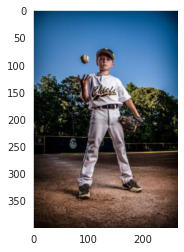

Sample cricket image:


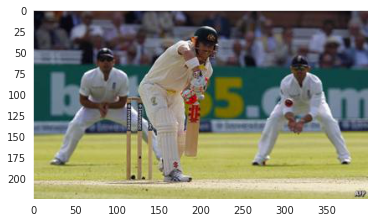

Sample football image:


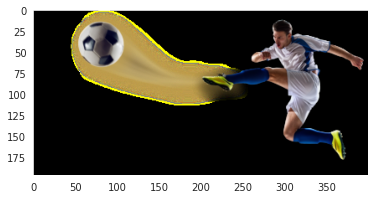

In [14]:
print("Sample baseball image:")
plt.imshow(load_img(f"{os.path.join(train_baseball_dir, os.listdir(train_baseball_dir)[0])}"))
plt.grid(False)
plt.show()

print("Sample cricket image:")
plt.imshow(load_img(f"{os.path.join(train_cricket_dir, os.listdir(train_cricket_dir)[0])}"))
plt.grid(False)
plt.show()

print("Sample football image:")
plt.imshow(load_img(f"{os.path.join(train_football_dir, os.listdir(train_football_dir)[0])}"))
plt.grid(False)
plt.show()

Notice how the images are of different shape, which means, we cannot feed the model with a specific shape, instead, we should resize all the images. 

In [15]:
sample_image  = load_img(f"{os.path.join(train_baseball_dir, os.listdir(train_baseball_dir)[0])}")
sample_array = img_to_array(sample_image)

print(f"Each image has shape: {sample_array.shape}")

Each image has shape: (400, 266, 3)


Handling the different size of the images is a critical step since our CNN won't be able to process the images properly without this step. As a matter of fact, we have different options to tackle down this problem: resizing, cropping or rescaling. To handle this properly, we will directly rescale dividing by the scalar number of 255, which is the optimum number when dealing with color images. Thus, this process will resize the images and make them all the same size. On the other hand, there is one more thing we should consider, and that is to divide the training folder into train/validation. One of our major hindrances to build a reliable model is the lack of a wide range of different images belonging to each class. Having said that, we expect to have a valdiation set of 20% max out of the original length of images. In real practice, having 43 images out of 211 belonging to 3 classes would not be an efficient split. However, since we don't have the original labels of the test dataset, we must be sure that our model performs well at least with this split on the validation dataset. Besides, images are quite diverse, and the data augmentation process will add noise to the dataset which will make our accuracy increase due to a higher flexibility in the model.

##### Train/Validation Split

In the upcoming step we will rearrange our data to our new folders "traintrain" and "trainval" which are the names derived from the original folder where our data lies (the train folder). Thus, we will create these folders and create a separate subdirectory for each class within these fodlers.

In [16]:
classes_dir = ["baseball", "cricket", "football"] 

val_ratio = 0.2
train_length_2 = 0
val_length = 0

for cls in classes_dir:
    os.makedirs(train_dir + "train/" + cls)
    os.makedirs(train_dir + "val/" + cls)
    src = train_dir + "/" + cls 

    allFileNames = os.listdir(src)
    np.random.shuffle(allFileNames)
    train_FileNames, val_FileNames = np.split(np.array(allFileNames), [int(len(allFileNames) * (1 - val_ratio))])
    train_FileNames = [src + "/" + name for name in train_FileNames.tolist()]
    val_FileNames = [src + "/" + name for name in val_FileNames.tolist()]

    print(f"Total number of images belonging to the class {cls}: ", len(allFileNames))
    print(f"Total number of training images belonging to the class {cls}: ", len(train_FileNames))
    print(f"Total number of validation images belonging to the class {cls}: ", len(val_FileNames), "\n")
    
    for name in train_FileNames:
        shutil.copy(name, train_dir + "train/" + cls)

    for name in val_FileNames:
        shutil.copy(name, train_dir + "val/" + cls)
    
    train_length_2 += len(train_FileNames)
    val_length += len(val_FileNames)

Total number of images belonging to the class baseball:  66
Total number of training images belonging to the class baseball:  52
Total number of validation images belonging to the class baseball:  14 

Total number of images belonging to the class cricket:  81
Total number of training images belonging to the class cricket:  64
Total number of validation images belonging to the class cricket:  17 

Total number of images belonging to the class football:  64
Total number of training images belonging to the class football:  51
Total number of validation images belonging to the class football:  13 



We can see that overall, the train/validation split is well balanced. Furthermore, we will save the length of the train and validation sets to properly specify the number of steps per epoch.

In [17]:
print(f"The total number of train and validation examples are {train_length_2} and {val_length} respectively.")

The total number of train and validation examples are 167 and 44 respectively.


Now let's set our new directories and jump to our first trial without data augmentation

In [18]:
train_dir_2 = base_dir + "/Imágenes-data-science-ii/traintrain"
val_dir = base_dir + "/Imágenes-data-science-ii/trainval"

##### The model without data augmentation

We choose not to use a very profound model since our goal is to generalize well enough. Furthermore, building a deeper model will increase the risk of exploding gradients. We also added a dropout layer to handle overfitting and a dense layer of 128 neurons before using the last layer with softmax. In addition to that, we are interested in saving time and reducing the computational cost of our model. Hence, we will use the "Callback" class created in our code to stop our model once it reaches to our goal threshold of performance.

In [19]:
epochs = 90
batch_size = 10
train_steps = int(train_length_2 / batch_size)
validation_steps = int(val_length / batch_size)

In [20]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get("loss")<0.4) and (logs.get("accuracy")>0.99):
            print("\nLoss is low and and accuracy is high so cancelling training!")
            self.model.stop_training = True

In [21]:
callbacks = myCallback()

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation="relu"), 
    tf.keras.layers.Dense(3, activation="softmax")  
])

In [22]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics = ["accuracy"])

In [23]:
train_datagen = ImageDataGenerator(rescale=1.0/255.)

train_generator = train_datagen.flow_from_directory(directory=train_dir_2,
                                                      color_mode="rgb",
                                                      batch_size=batch_size,
                                                      class_mode="sparse",
                                                      shuffle=False,
                                                      target_size=(200, 200))

val_datagen = ImageDataGenerator(rescale=1.0/255.)

val_generator = val_datagen.flow_from_directory(directory=val_dir,
                                                      color_mode="rgb",
                                                      batch_size=batch_size,
                                                      class_mode="sparse",
                                                      shuffle=False,
                                                      target_size=(200, 200))

test_datagen = ImageDataGenerator(rescale = 1.0/255.)

test_generator = test_datagen.flow_from_directory(
        test_dir, 
        target_size=(200, 200),
        color_mode="rgb",
        shuffle = False,
        class_mode=None,
        batch_size=batch_size)

Found 166 images belonging to 3 classes.
Found 44 images belonging to 3 classes.
Found 41 images belonging to 1 classes.


In [24]:
history = model.fit(train_generator,
            steps_per_epoch=train_steps,
            epochs=epochs,
            validation_data=val_generator,
            validation_steps=validation_steps,
            callbacks=[callbacks])

Epoch 1/90
16/16 [==============================] - 8s 417ms/step - loss: 5.6528 - accuracy: 0.3077 - val_loss: 1.1939 - val_accuracy: 0.4250
Epoch 2/90
16/16 [==============================] - 6s 390ms/step - loss: 1.0685 - accuracy: 0.4103 - val_loss: 1.0788 - val_accuracy: 0.4750
Epoch 3/90
16/16 [==============================] - 6s 391ms/step - loss: 1.0948 - accuracy: 0.4167 - val_loss: 1.0938 - val_accuracy: 0.5000
Epoch 4/90
16/16 [==============================] - 6s 392ms/step - loss: 1.0750 - accuracy: 0.4038 - val_loss: 1.0860 - val_accuracy: 0.4500
Epoch 5/90
16/16 [==============================] - 6s 394ms/step - loss: 0.9978 - accuracy: 0.5897 - val_loss: 1.0717 - val_accuracy: 0.4250
Epoch 6/90
16/16 [==============================] - 6s 394ms/step - loss: 0.9821 - accuracy: 0.5321 - val_loss: 1.0676 - val_accuracy: 0.4250
Epoch 7/90
16/16 [==============================] - 6s 396ms/step - loss: 0.8853 - accuracy: 0.6125 - val_loss: 1.0582 - val_accuracy: 0.4500
Epoch 

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 73728)             0         
                                                                 
 dropout (Dropout)           (None, 73728)             0

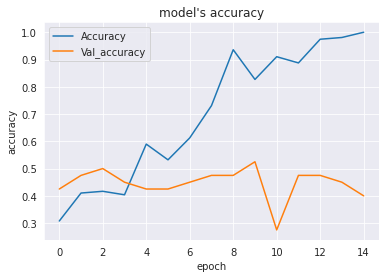

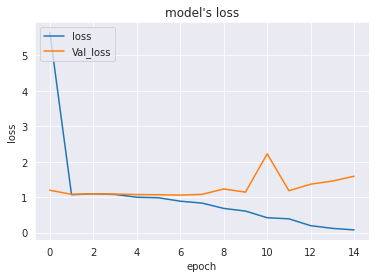

In [26]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

plt.plot(acc)
plt.plot(val_acc)
plt.title("model's accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["Accuracy", "Val_accuracy"], loc="upper left")
plt.show()

plt.plot(loss)
plt.plot(val_loss)
plt.title("model's loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["loss", "Val_loss"], loc="upper left")
plt.show()

After testing with different architectures while trying to reduce the complexity of the model, it seems obvious that it works better with a more shallow model. However, we cannot ignore the fact that we are facing a clear problem of overfitting in the training dataset. Having said that, there is one thing we must do and that is to expand our dataset with data augmentation techniques. It is accurate to say that our odds of performing well without the augmentated data are significantly low, let alone expect the model to overcome the plateau of 0.5 of val_acc. Thus, the lack of data is our main drawback. Fortunately, we gona retest the model with augmented data this time to tackle down overfitting. 

In [27]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

preds_1 = probability_model.predict(test_generator)

In [28]:
preds_1

array([[0.30655062, 0.45623532, 0.2372141 ],
       [0.5741682 , 0.21310921, 0.21272257],
       [0.25874642, 0.22483374, 0.51641977],
       [0.2521219 , 0.2300239 , 0.5178543 ],
       [0.5024111 , 0.26892015, 0.22866869],
       [0.33602676, 0.38262284, 0.2813503 ],
       [0.5472448 , 0.2252368 , 0.22751841],
       [0.29959524, 0.23723957, 0.46316525],
       [0.27819553, 0.4854963 , 0.23630817],
       [0.38107497, 0.36576158, 0.2531634 ],
       [0.39645654, 0.2698649 , 0.33367857],
       [0.30257556, 0.261607  , 0.43581748],
       [0.5366716 , 0.24179989, 0.22152862],
       [0.44231963, 0.272433  , 0.28524727],
       [0.25663325, 0.2264404 , 0.51692635],
       [0.4934919 , 0.2587323 , 0.24777585],
       [0.3284668 , 0.28333992, 0.3881933 ],
       [0.34928235, 0.35256433, 0.29815328],
       [0.56889844, 0.21649586, 0.2146057 ],
       [0.5501537 , 0.22639829, 0.22344798],
       [0.4386168 , 0.32834235, 0.23304085],
       [0.5740153 , 0.21299724, 0.21298753],
       [0.

In [29]:
predicted_classes = preds_1.argmax(axis=1)
predicted_classes

array([1, 0, 2, 2, 0, 1, 0, 2, 1, 0, 0, 2, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0,
       0, 2, 1, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2])

##### The model with data augmentation

We will provide a different set of values for the callback since it's the "val_accuracy" the main metric of interest we have to measure.

In [37]:
class myCallback_2(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get("val_loss")<0.4) and (logs.get("val_accuracy")>0.99):
            print("\nLoss is low and and val_accuracy is high so cancelling training!")
            self.model.stop_training = True

In [38]:
callback_2 = myCallback_2()

model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation="relu"), 
    tf.keras.layers.Dense(3, activation="softmax")  
])

In [39]:
model_2.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics = ["accuracy"])

In [40]:
train_datagen_2 = ImageDataGenerator(rescale=1.0/255.,
                                     rotation_range=0.1,
                                     width_shift_range=0.1,
                                     height_shift_range=0.1,
                                     shear_range=0.1,
                                     zoom_range=0.1,
                                     horizontal_flip=False,
                                     fill_mode="nearest")

train_generator_2 = train_datagen_2.flow_from_directory(directory=train_dir,
                                                      color_mode="rgb",
                                                      batch_size=batch_size,
                                                      class_mode="sparse",
                                                      shuffle=False,
                                                      target_size=(200, 200))

val_datagen_2 = ImageDataGenerator(rescale=1.0/255.)

val_generator_2 = val_datagen_2.flow_from_directory(directory=val_dir,
                                                      color_mode="rgb",
                                                      batch_size=batch_size,
                                                      class_mode="sparse",
                                                      shuffle=False,
                                                      target_size=(200, 200))

test_datagen_2 = ImageDataGenerator(rescale = 1.0/255.)

test_generator_2 = test_datagen.flow_from_directory(
        test_dir, 
        target_size=(200, 200),
        color_mode="rgb",
        shuffle = False,
        class_mode=None,
        batch_size=batch_size)

Found 210 images belonging to 3 classes.
Found 44 images belonging to 3 classes.
Found 41 images belonging to 1 classes.


In [41]:
history_2 = model_2.fit(train_generator_2,
            steps_per_epoch=train_steps,
            epochs=epochs,
            validation_data=val_generator_2,
            validation_steps=validation_steps,
            callbacks=[callback_2])

Epoch 1/90
16/16 [==============================] - 8s 488ms/step - loss: 6.8385 - accuracy: 0.2562 - val_loss: 1.1276 - val_accuracy: 0.4250
Epoch 2/90
16/16 [==============================] - 8s 471ms/step - loss: 1.1034 - accuracy: 0.2750 - val_loss: 1.1126 - val_accuracy: 0.4500
Epoch 3/90
16/16 [==============================] - 8s 466ms/step - loss: 1.1092 - accuracy: 0.3750 - val_loss: 1.0935 - val_accuracy: 0.4250
Epoch 4/90
16/16 [==============================] - 8s 464ms/step - loss: 1.1042 - accuracy: 0.3750 - val_loss: 1.0728 - val_accuracy: 0.4250
Epoch 5/90
16/16 [==============================] - 8s 463ms/step - loss: 1.1012 - accuracy: 0.4125 - val_loss: 1.0600 - val_accuracy: 0.4250
Epoch 6/90
16/16 [==============================] - 8s 465ms/step - loss: 1.0863 - accuracy: 0.3938 - val_loss: 1.0669 - val_accuracy: 0.4250
Epoch 7/90
16/16 [==============================] - 8s 465ms/step - loss: 1.1306 - accuracy: 0.3187 - val_loss: 1.0834 - val_accuracy: 0.4500
Epoch 

In [42]:
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 99, 99, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 73728)             0         
                                                                 
 dropout_2 (Dropout)         (None, 73728)            

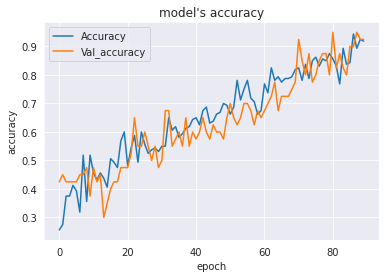

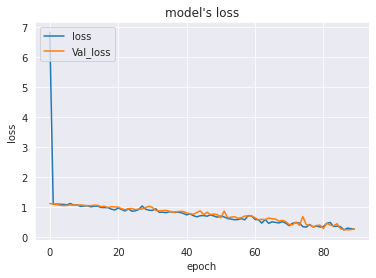

In [43]:
acc_2 = history_2.history["accuracy"]
val_acc_2 = history_2.history["val_accuracy"]
loss_2 = history_2.history["loss"]
val_loss_2 = history_2.history["val_loss"]

plt.plot(acc_2)
plt.plot(val_acc_2)
plt.title("model's accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["Accuracy", "Val_accuracy"], loc="upper left")
plt.show()

plt.plot(loss_2)
plt.plot(val_loss_2)
plt.title("model's loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["loss", "Val_loss"], loc="upper left")
plt.show()

Now, these are completely different results. Through each of the epoch slowly but steady, accuracy is getting higher at the pace of the val_accuracy to the top. The same behaviour is observed in loss and val_loss which is expected. We can safely assume that the model learned well on the training and augmented data. With this, we can make our predictions for the test dataset with the model_2. But before that, let's compare our results between the models and take a look at the confusion matrix. 

In [44]:
probability_model_2 = tf.keras.Sequential([model_2, 
                                         tf.keras.layers.Softmax()])

preds_2 = probability_model_2.predict(test_generator)

In [45]:
preds_2

array([[0.23039697, 0.50461376, 0.26498926],
       [0.57490706, 0.21240175, 0.21269119],
       [0.24105293, 0.2188545 , 0.5400926 ],
       [0.25554168, 0.52270037, 0.22175798],
       [0.23004827, 0.2856507 , 0.48430103],
       [0.26515287, 0.3921292 , 0.3427179 ],
       [0.42577794, 0.23337734, 0.34084472],
       [0.2121829 , 0.21234563, 0.57547146],
       [0.23469064, 0.3797547 , 0.3855547 ],
       [0.255344  , 0.40978947, 0.33486652],
       [0.4324697 , 0.25160548, 0.3159248 ],
       [0.30853713, 0.2291675 , 0.4622954 ],
       [0.283049  , 0.42615503, 0.29079595],
       [0.4039455 , 0.24073985, 0.3553146 ],
       [0.21194166, 0.21194158, 0.57611674],
       [0.39074925, 0.29141566, 0.3178351 ],
       [0.22007643, 0.5647268 , 0.21519676],
       [0.24422333, 0.22150508, 0.53427154],
       [0.28241557, 0.4915883 , 0.22599614],
       [0.22898711, 0.5290552 , 0.24195771],
       [0.29716933, 0.47477984, 0.22805083],
       [0.34592625, 0.23394665, 0.4201271 ],
       [0.

In [46]:
predicted_classes_2 = preds_2.argmax(axis=1)
predicted_classes_2

array([1, 0, 2, 1, 2, 1, 0, 2, 2, 1, 0, 2, 1, 0, 2, 0, 1, 2, 1, 1, 1, 2,
       0, 2, 2, 2, 1, 2, 1, 0, 2, 2, 0, 2, 1, 2, 2, 1, 1, 1, 1])

##### Models comparison

In [47]:
ind = 0
f = 0
t = 0
for x, y in zip(predicted_classes, predicted_classes_2):
    if x == y: 
        print(str(ind) + ":", True)
        t += 1
    else:
        print(str(ind) + ":", False)
        f += 1
    ind += 1
print(f"\nThe total number of different classes between the 2 models is: {f}\nWhile the total number of equal predicted classes is: {t}")

0: True
1: True
2: True
3: False
4: False
5: True
6: True
7: True
8: False
9: False
10: True
11: True
12: False
13: True
14: True
15: True
16: False
17: False
18: False
19: False
20: False
21: False
22: True
23: True
24: False
25: False
26: False
27: True
28: False
29: True
30: True
31: False
32: True
33: False
34: False
35: True
36: True
37: False
38: False
39: False
40: False

The total number of different classes between the 2 models is: 22
While the total number of equal predicted classes is: 19


We can see that there is a slight difference in predictions between the models

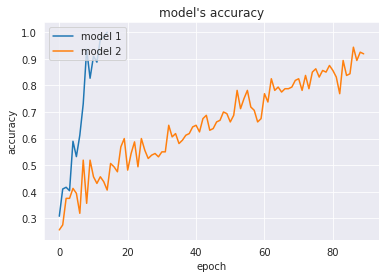

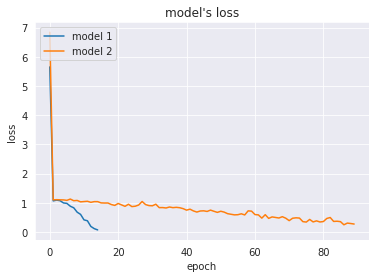

In [48]:
# Summarize history of model's training accuracy 
plt.plot(history.history["accuracy"])
plt.plot(history_2.history["accuracy"])
plt.title("model's accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["model 1", "model 2"], loc="upper left")
plt.show()

# Summarize history for training loss
plt.plot(history.history["loss"])
plt.plot(history_2.history["loss"])
plt.title("model's loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["model 1", "model 2"], loc="upper left")
plt.show()

The key takeaways from our plots are: model 1 quickly improves to excellence in both, accuracy and loss. However, this is a tricky obseravation. Our model 2 did not learn completely the features from the training set precisely because we did data augmentation. It takes much more for model 2 to learn and improve its metrics, however it's worth the time. 

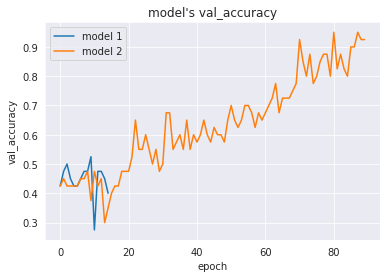

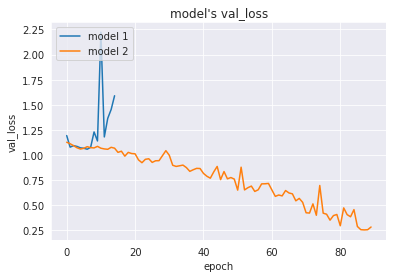

In [49]:
# Summarize history of model's validation accuracy
plt.plot(history.history["val_accuracy"])
plt.plot(history_2.history["val_accuracy"])
plt.title("model's val_accuracy")
plt.ylabel("val_accuracy")
plt.xlabel("epoch")
plt.legend(["model 1", "model 2"], loc="upper left")
plt.show()

# Summarize history for validation loss
plt.plot(history.history["val_loss"])
plt.plot(history_2.history["val_loss"])
plt.title("model's val_loss")
plt.ylabel("val_loss")
plt.xlabel("epoch")
plt.legend(["model 1", "model 2"], loc="upper left")
plt.show()

Therefore, we can observe how our model 1 performed poorly regarding the validation set, and model 2 slowly reached the maximum val_accuracy around the 80th epoch. On the other hand, around the 30th epoch, val_loss started to fall below 0.75, where it slowly continued to descend down to minimum.

Confusion Matrices

In [50]:
def cm_cr(test_gen, model):
    preds=model.predict(test_gen)    
    labels=test_gen.labels
    classes=list(test_gen.class_indices.keys()) 
    pred_list=[ ] 
    true_list=[]
    for i, p in enumerate(preds):
        index=np.argmax(p)
        pred_list.append(classes[index])
        true_list.append(classes[labels[i]])
    y_pred=np.array(pred_list)
    y_true=np.array(true_list)
    clr = metrics.classification_report(y_true, y_pred, target_names=classes)
    print("Classification Report:\n----------------------\n", clr)
    cm = metrics.confusion_matrix(y_true, y_pred )        
    length=len(classes)
    if length<8:
        fig_width=8
        fig_height=8
    else:
        fig_width= int(length * .5)
        fig_height= int(length * .5)
    plt.figure(figsize=(fig_width, fig_height))
    sns.heatmap(cm, annot=True, vmin=0, fmt="g", cmap="Blues", cbar=False)       
    plt.xticks(np.arange(length)+.5, classes, rotation= 90, fontsize=16)
    plt.yticks(np.arange(length)+.5, classes, rotation=0, fontsize=16)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

Classification Report:
----------------------
               precision    recall  f1-score   support

    baseball       0.36      0.64      0.46        14
     cricket       0.56      0.29      0.38        17
    football       0.40      0.31      0.35        13

    accuracy                           0.41        44
   macro avg       0.44      0.41      0.40        44
weighted avg       0.45      0.41      0.40        44



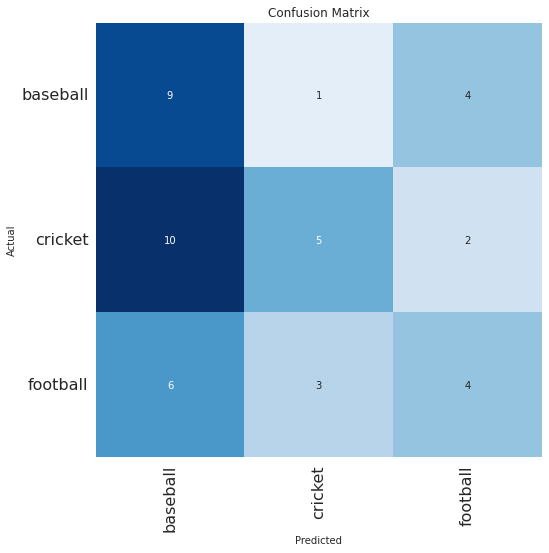

In [51]:
cm_cr(val_generator, model)

Classification Report:
----------------------
               precision    recall  f1-score   support

    baseball       1.00      0.93      0.96        14
     cricket       0.94      0.88      0.91        17
    football       0.87      1.00      0.93        13

    accuracy                           0.93        44
   macro avg       0.93      0.94      0.93        44
weighted avg       0.94      0.93      0.93        44



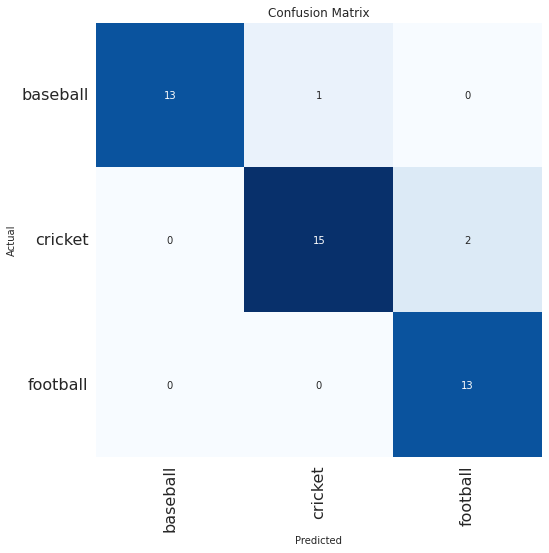

In [52]:
cm_cr(val_generator_2, model_2)

We can conclude that indeed, the model_2 outperforms the capability of model_1 due to it's resilience to overfitting by the noise added with data augmentation. We can confidently rely on our second model to make predictions for the test dataset. Besides, our goal was to get the F1-Score Macro, which results in an outstanding 0.93 compared to tiny 0.40 in the first model. In conclusion, to improve our results we could get much more data to improve the flexibility of our model to learn the patterns of what type of sport it is illustrated in the image. However, in real case scenario, many times we will face the problem of having a very limited amount of data and we will have to use data augmentation to help our model to generalize well enough. 

##### Results submission

In [53]:
predicted_classes_2

array([1, 0, 2, 1, 2, 1, 0, 2, 2, 1, 0, 2, 1, 0, 2, 0, 1, 2, 1, 1, 1, 2,
       0, 2, 2, 2, 1, 2, 1, 0, 2, 2, 0, 2, 1, 2, 2, 1, 1, 1, 1])

In [54]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
preds_labels = [labels[k] for k in predicted_classes_2]

In [55]:
filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":preds_labels,
                      "Value":predicted_classes_2})
results.to_csv("results.csv",index=False)
files.download("results.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [56]:
results_json = pd.read_csv("results.csv")

In [57]:
results_json.to_json("predictions.json")

In [58]:
files.download("predictions.json")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>